In [52]:
print("Hello World!")

Hello World!


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
%matplotlib inline

In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")
path+="/Customers.csv"
print("Path to dataset files:", path)

Path to dataset files: /home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


In [55]:
print(path)
sales_data=pd.read_csv(path,index_col='CustomerID')
sales_data

/home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [56]:
def gradient_calc(W,X,b,Y):
    w_gradient_sum=0
    b_gradient_sum=0
    for i in range(X.shape[0]):
        w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
        b_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])
    return w_gradient_sum/len(X),b_gradient_sum/len(X)

In [57]:
def calculate_cost(W,X,b,Y):
    cost=0

    for i in range(X.shape[0]):
        cost+=((np.dot(W,X[i])+b)-Y[i])**2
    return cost/len(X)*2    

In [58]:
def gradient_descent_calc(W,X,b,Y,alpha,error_margin,iterations):
    
    if len(W)==0:
        weights = np.random.rand(X.shape[1])  # Initialize weights with the number of features
    else:
        weights = W

    if len(b) ==0:  
        biases = np.random.rand(1)[0]  
    else:
        biases = b
    print(f"Initial W: {weights} Initial B: {biases}")   
    cost_history=[]
    m,n=X.shape
    iter_count=0
    while iter_count!=iterations:
        cost_value=calculate_cost(weights,X,biases,Y)
        cost_history.append(cost_value)
        if cost_value<=error_margin:
            print("Error margin reached")
            break
        new_w,new_b=gradient_calc(weights,X,biases,Y)
        weights=weights - alpha * new_w
        biases=biases - alpha * new_b
        iter_count+=1
            
    
    return weights,biases,cost_history

    

In [59]:
# X_train = np.array([[1], [2], [3], [4]])  # 4 training samples
# Y_train = np.array([2, 3, 5, 7])

# X_train = np.array([[1, 2],
#                     [2, 3],
#                     [3, 4],
#                     [4, 5],
#                     [5, 6]])

# # Corresponding target values
# Y_train = np.array([3, 5, 7, 9, 11])

X_train = np.array([[1**2],  # 1, 1, 1
                    [2**2],  # 4, 8, 16
                    [3**2],  # 9, 27, 81
                    [4**2],  # 16, 64, 256
                    [5**2]]) # 25, 125, 625

# Corresponding target values
Y_train = np.array([2, 3, 4, 5, 6])  # You can set any desired pattern

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,0.00002,0.01,2000)
predicted_x=np.dot(predicted_w,[25**2])+predicted_b
print(f"predicted x is {predicted_x} ")
print(f"line eqn: {predicted_w}x+{predicted_b})")
print(f"final cost is {cost_history[-1]}, predicted w :{predicted_w} and predicted b :{predicted_b}")
for i in cost_history:
    print(f"{i}\n")

Initial W: [0.92277203] Initial B: 0.6449146267846505
predicted x is 157.472027409663 
line eqn: [0.25094438]x+0.6317889921013737)
final cost is 2.114370115869885, predicted w :[0.25094438] and predicted b :0.6317889921013737
179.44768413928773

178.0575994570902

176.67841465321925

175.31004425808047

173.95240347227497

172.6054081613445

171.26897485055719

169.94302071973453

168.62746359811882

167.3222219592808

166.02721491606712

164.7423622155879

163.46758423424308

162.2028019727877

160.94793705143653

159.70291170500644

158.46764877809716

157.24207172030972

156.0261045815026

154.81967200708473

153.6226992333456

152.43511208282212

151.25683695970127

150.08780084525984

148.92793129333853

147.77715642585295

146.63540492833874

145.502606045532

144.37868957698475

143.26358587271426

142.15722582888654

141.05954088353397

139.97046301230623

138.88992472425485

137.81785905765037

136.75419957583276

135.69888036309416

134.65183602059375

133.61300166230495

132

2.1280935606687166

2.1280573321448477

2.1280211519485555

2.1279850197044787

2.127948935040198

2.127912897586218

2.1278769069759336

2.127840962845622

2.127805064834409

2.1277692125842473

2.127733405739902

2.127697643948923

2.1276619268616184

2.1276262541310467

2.1275906254129784

2.12755504036589

2.1275194986509325

2.1274839999319144

2.12744854387528

2.12741313015009

2.1273777584279996

2.127342428383238

2.127307139692591

2.1272718920353735

2.127236685093423

2.1272015185510655

2.127166392095103

2.127131305414797

2.1270962582018402

2.127061250150348

2.1270262809568306

2.1269913503201794

2.1269564579416476

2.1269216035248277

2.1268867867756414

2.1268520074023116

2.126817265115351

2.1267825596275443

2.1267478906539248

2.12671325791176

2.1266786611205384

2.126644100001945

2.1266095742798483

2.126575083680281

2.1265406279314236

2.12650620676359

2.126471819909207

2.126437467102803

2.126403148080979

2.126368862582412

2.1263346103478216

2.1263003

In [60]:
print(type(np.random.rand(2)))
X_train.shape

<class 'numpy.ndarray'>


(5, 1)

In [61]:
def sigmoid(f_x):
    return 1/(1+np.exp(-(f_x)))

In [62]:
def logistic_cf(W,X,y,b):
    cost=0
    m,n=X.shape
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        cost+= y[i] * (np.log(g_x)) + (1-y[i]) * (np.log(1-(g_x)))
    cost=(-1/m)*cost
    return cost

In [63]:
def logistic_gradient(W,X,y,b):
    m=X.shape[0]
    gradient_w=0
    gradient_b=0
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        gradient_w+=(g_x-y[i])*X[i]
        gradient_b+=(g_x-y[i])
    return (1/m)*gradient_w,(1/m)*gradient_b

In [64]:
def logistic_gradient_descent(W,X,y,b,iterations,alpha,error_margin):
    m,n=X.shape
    
    if len(W)==0:
        W=np.random.rand(n)   
    
    if len(b)==0:
        b=np.random.rand(1)[0]
    cost_history=[]
        
    iter_count=0
    while iter_count<iterations:
        current_cost=logistic_cf(W,X,y,b)
        cost_history.append(current_cost)
        if current_cost>error_margin:
            grad_w,grad_b=logistic_gradient(W,X,y,b)
            W=W-alpha*grad_w
            b=b-alpha*grad_b
            iter_count+=1
        else:
            break
    return W,b,cost_history        

In [65]:
# X = np.array([
#     [2, 3],    # Sample 1: Will fail (0)
#     [3, 4],    # Sample 2: Will fail (0) 
#     [4, 5],    # Sample 3: Will fail (0)
#     [5, 3],    # Sample 4: Will pass (1)
#     [6, 4],    # Sample 5: Will pass (1)
#     [7, 5],    # Sample 6: Will pass (1)
#     [3, 6],    # Sample 7: Will fail (0)
#     [4, 7],    # Sample 8: Will pass (1)
#     [5, 6],    # Sample 9: Will pass (1)
#     [6, 3]     # Sample 10: Will pass (1)
# ])

# # Labels y
# y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

#############################################################################################
# X_below_boundary = np.column_stack((np.random.uniform(0, 4, 20), np.random.uniform(0, 20, 20)))
# X_above_boundary = np.column_stack((np.random.uniform(4, 8, 20), np.random.uniform(0, 20, 20)))

# # Combine data and labels
# X = np.vstack((X_below_boundary, X_above_boundary))
# y = np.array([0] * 20 + [1] * 20)

# # Shuffle data to ensure it's not ordered
# shuffled_indices = np.random.permutation(len(X))
# X, y = X[shuffled_indices], y[shuffled_indices]
#############################################################################################



X = np.array([[2, 1], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], 
              [2, 4], [3, 5], [4, 4], [5, 6], [6, 5], [7, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


W,b,cost_history=logistic_gradient_descent([],X,y,[],6000,0.1,0.0001)
for i,j in enumerate(cost_history):
    print(f' Cost : {j} iteration {i+1}')

 Cost : 0.8500386621899385 iteration 1
 Cost : 0.7455439134838994 iteration 2
 Cost : 0.6746197131091234 iteration 3
 Cost : 0.6350144115618389 iteration 4
 Cost : 0.6156516175866604 iteration 5
 Cost : 0.6052027869692784 iteration 6
 Cost : 0.5977931417546605 iteration 7
 Cost : 0.5915035822482118 iteration 8
 Cost : 0.5858427189443821 iteration 9
 Cost : 0.5806758311595999 iteration 10
 Cost : 0.5759438999692288 iteration 11
 Cost : 0.5716047069043365 iteration 12
 Cost : 0.5676215532215321 iteration 13
 Cost : 0.5639610858232071 iteration 14
 Cost : 0.5605927935138191 iteration 15
 Cost : 0.5574888011881243 iteration 16
 Cost : 0.554623709860798 iteration 17
 Cost : 0.5519744378290463 iteration 18
 Cost : 0.5495200579664741 iteration 19
 Cost : 0.5472416337250026 iteration 20
 Cost : 0.5451220573401743 iteration 21
 Cost : 0.5431458931956883 iteration 22
 Cost : 0.54129922850877 iteration 23
 Cost : 0.5395695327587051 iteration 24
 Cost : 0.5379455266725196 iteration 25
 Cost : 0.53

 Cost : 0.3193660883699765 iteration 1416
 Cost : 0.31934116824348613 iteration 1417
 Cost : 0.31931628427189557 iteration 1418
 Cost : 0.31929143638649665 iteration 1419
 Cost : 0.3192666245187469 iteration 1420
 Cost : 0.3192418486002687 iteration 1421
 Cost : 0.31921710856284924 iteration 1422
 Cost : 0.31919240433843954 iteration 1423
 Cost : 0.3191677358591543 iteration 1424
 Cost : 0.319143103057271 iteration 1425
 Cost : 0.31911850586523055 iteration 1426
 Cost : 0.3190939442156349 iteration 1427
 Cost : 0.31906941804124866 iteration 1428
 Cost : 0.31904492727499706 iteration 1429
 Cost : 0.31902047184996624 iteration 1430
 Cost : 0.3189960516994026 iteration 1431
 Cost : 0.3189716667567123 iteration 1432
 Cost : 0.3189473169554607 iteration 1433
 Cost : 0.3189230022293723 iteration 1434
 Cost : 0.31889872251232987 iteration 1435
 Cost : 0.31887447773837396 iteration 1436
 Cost : 0.3188502678417029 iteration 1437
 Cost : 0.3188260927566716 iteration 1438
 Cost : 0.31880195241779

 Cost : 0.30222984273484244 iteration 2976
 Cost : 0.3022255686218407 iteration 2977
 Cost : 0.3022212984595142 iteration 2978
 Cost : 0.30221703224348523 iteration 2979
 Cost : 0.30221276996938246 iteration 2980
 Cost : 0.30220851163284035 iteration 2981
 Cost : 0.30220425722949856 iteration 2982
 Cost : 0.3022000067550036 iteration 2983
 Cost : 0.302195760205007 iteration 2984
 Cost : 0.30219151757516655 iteration 2985
 Cost : 0.3021872788611456 iteration 2986
 Cost : 0.30218304405861324 iteration 2987
 Cost : 0.30217881316324474 iteration 2988
 Cost : 0.30217458617072096 iteration 2989
 Cost : 0.3021703630767283 iteration 2990
 Cost : 0.3021661438769593 iteration 2991
 Cost : 0.30216192856711166 iteration 2992
 Cost : 0.30215771714288986 iteration 2993
 Cost : 0.3021535096000029 iteration 2994
 Cost : 0.3021493059341666 iteration 2995
 Cost : 0.30214510614110174 iteration 2996
 Cost : 0.3021409102165348 iteration 2997
 Cost : 0.30213671815619875 iteration 2998
 Cost : 0.302132529955

 Cost : 0.29860265019539306 iteration 4501
 Cost : 0.298601439950263 iteration 4502
 Cost : 0.29860023061726765 iteration 4503
 Cost : 0.29859902219563195 iteration 4504
 Cost : 0.2985978146845816 iteration 4505
 Cost : 0.2985966080833429 iteration 4506
 Cost : 0.29859540239114263 iteration 4507
 Cost : 0.2985941976072092 iteration 4508
 Cost : 0.2985929937307709 iteration 4509
 Cost : 0.2985917907610573 iteration 4510
 Cost : 0.2985905886972983 iteration 4511
 Cost : 0.29858938753872494 iteration 4512
 Cost : 0.29858818728456904 iteration 4513
 Cost : 0.29858698793406246 iteration 4514
 Cost : 0.29858578948643877 iteration 4515
 Cost : 0.2985845919409318 iteration 4516
 Cost : 0.2985833952967762 iteration 4517
 Cost : 0.2985821995532073 iteration 4518
 Cost : 0.29858100470946125 iteration 4519
 Cost : 0.29857981076477486 iteration 4520
 Cost : 0.2985786177183858 iteration 4521
 Cost : 0.29857742556953226 iteration 4522
 Cost : 0.2985762343174536 iteration 4523
 Cost : 0.29857504396138

 Cost : 0.2974957787635699 iteration 6002
 Cost : 0.29749536192001064 iteration 6003
 Cost : 0.2974949453576305 iteration 6004
 Cost : 0.2974945290762237 iteration 6005
 Cost : 0.29749411307558526 iteration 6006
 Cost : 0.29749369735550973 iteration 6007
 Cost : 0.29749328191579266 iteration 6008
 Cost : 0.2974928667562293 iteration 6009
 Cost : 0.29749245187661455 iteration 6010
 Cost : 0.2974920372767448 iteration 6011
 Cost : 0.29749162295641524 iteration 6012
 Cost : 0.2974912089154219 iteration 6013
 Cost : 0.297490795153561 iteration 6014
 Cost : 0.29749038167062886 iteration 6015
 Cost : 0.29748996846642173 iteration 6016
 Cost : 0.2974895555407362 iteration 6017
 Cost : 0.2974891428933691 iteration 6018
 Cost : 0.2974887305241173 iteration 6019
 Cost : 0.2974883184327779 iteration 6020
 Cost : 0.29748790661914837 iteration 6021
 Cost : 0.29748749508302585 iteration 6022
 Cost : 0.29748708382420785 iteration 6023
 Cost : 0.2974866728424924 iteration 6024
 Cost : 0.29748626213767

 Cost : 0.2970795037592901 iteration 7629
 Cost : 0.2970793588853227 iteration 7630
 Cost : 0.29707921410244237 iteration 7631
 Cost : 0.2970790694105891 iteration 7632
 Cost : 0.29707892480970277 iteration 7633
 Cost : 0.29707878029972284 iteration 7634
 Cost : 0.2970786358805896 iteration 7635
 Cost : 0.29707849155224253 iteration 7636
 Cost : 0.2970783473146217 iteration 7637
 Cost : 0.2970782031676674 iteration 7638
 Cost : 0.29707805911131935 iteration 7639
 Cost : 0.29707791514551773 iteration 7640
 Cost : 0.29707777127020285 iteration 7641
 Cost : 0.2970776274853148 iteration 7642
 Cost : 0.29707748379079335 iteration 7643
 Cost : 0.2970773401865794 iteration 7644
 Cost : 0.2970771966726129 iteration 7645
 Cost : 0.2970770532488341 iteration 7646
 Cost : 0.29707690991518376 iteration 7647
 Cost : 0.2970767666716018 iteration 7648
 Cost : 0.2970766235180291 iteration 7649
 Cost : 0.29707648045440604 iteration 7650
 Cost : 0.29707633748067325 iteration 7651
 Cost : 0.2970761945967

 Cost : 0.29694776344181895 iteration 8968
 Cost : 0.29694770002801085 iteration 8969
 Cost : 0.296947636652667 iteration 8970
 Cost : 0.29694757331576366 iteration 8971
 Cost : 0.29694751001727626 iteration 8972
 Cost : 0.2969474467571809 iteration 8973
 Cost : 0.29694738353545336 iteration 8974
 Cost : 0.29694732035206967 iteration 8975
 Cost : 0.29694725720700565 iteration 8976
 Cost : 0.2969471941002374 iteration 8977
 Cost : 0.2969471310317403 iteration 8978
 Cost : 0.296947068001491 iteration 8979
 Cost : 0.29694700500946525 iteration 8980
 Cost : 0.29694694205563876 iteration 8981
 Cost : 0.29694687913998824 iteration 8982
 Cost : 0.2969468162624888 iteration 8983
 Cost : 0.29694675342311716 iteration 8984
 Cost : 0.29694669062184925 iteration 8985
 Cost : 0.2969466278586609 iteration 8986
 Cost : 0.2969465651335283 iteration 8987
 Cost : 0.29694650244642773 iteration 8988
 Cost : 0.2969464397973351 iteration 8989
 Cost : 0.2969463771862267 iteration 8990
 Cost : 0.2969463146130

 Cost : 0.2969001951206217 iteration 9966
 Cost : 0.29690016030604166 iteration 9967
 Cost : 0.2969001255121888 iteration 9968
 Cost : 0.2969000907390503 iteration 9969
 Cost : 0.2969000559866137 iteration 9970
 Cost : 0.296900021254866 iteration 9971
 Cost : 0.296899986543795 iteration 9972
 Cost : 0.29689995185338763 iteration 9973
 Cost : 0.2968999171836313 iteration 9974
 Cost : 0.2968998825345137 iteration 9975
 Cost : 0.296899847906022 iteration 9976
 Cost : 0.29689981329814347 iteration 9977
 Cost : 0.2968997787108657 iteration 9978
 Cost : 0.2968997441441762 iteration 9979
 Cost : 0.296899709598062 iteration 9980
 Cost : 0.29689967507251125 iteration 9981
 Cost : 0.2968996405675107 iteration 9982
 Cost : 0.29689960608304766 iteration 9983
 Cost : 0.29689957161911035 iteration 9984
 Cost : 0.2968995371756854 iteration 9985
 Cost : 0.2968995027527608 iteration 9986
 Cost : 0.29689946835032394 iteration 9987
 Cost : 0.29689943396836227 iteration 9988
 Cost : 0.2968993996068632 ite

In [66]:
def pred_logistic_regression(calculated_w,calculated_b,X):
    probability_value=sigmoid(pred_linear_regression(calculated_w,calculated_b,X))
    return True if probability_value>0.5 else False

In [67]:
def pred_linear_regression(calculated_w,calculated_b,X):
    return np.dot(calculated_w,X)+calculated_b

In [68]:
test_value=np.array([2,5])
inferred_x=np.dot(W,test_value)+b
pred=sigmoid(inferred_x)
# print(W,b)
if pred>=0.5:
    print("Passes Exam")
else:
    print("Fails exam")

# Visualization of decision boundary when only two features are present 
decision_boundary= [(x_1,(- (b + W[0] * x_1) / W[1])) for x_1 in range(8) ]
db_x=[i for i,j in decision_boundary]
db_y=[j for i,j in decision_boundary]
# print(decision_boundary)

Passes Exam


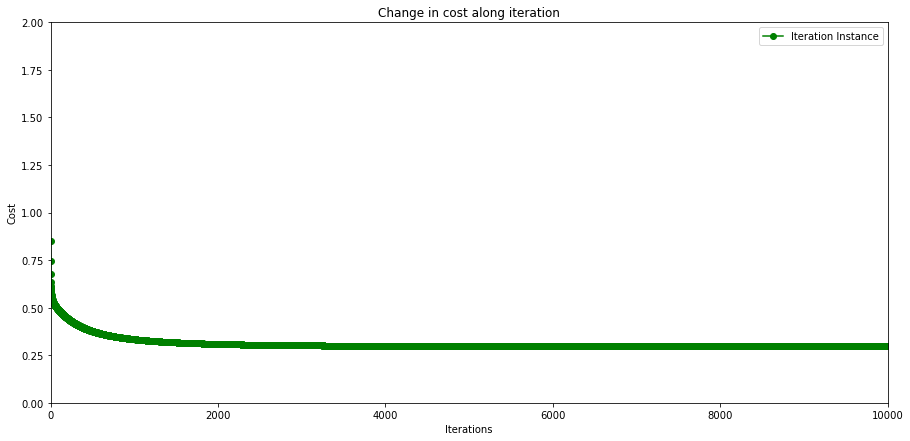

In [69]:
plt.figure(figsize=(15,7)) # must be declared first
plt.plot([i for i in range(len(cost_history))],cost_history,'go-',label='Iteration Instance')
plt.title('Change in cost along iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.xlim(0, 10000) #value limits 
plt.ylim(0, 2) #value limits

plt.show()

(0.0, 20.0)

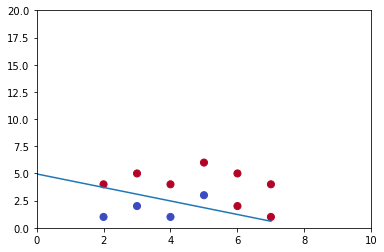

In [70]:
np
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.plot(db_x,db_y)
plt.xlim(0, 10) #value limits 
plt.ylim(0, 20) #value limits


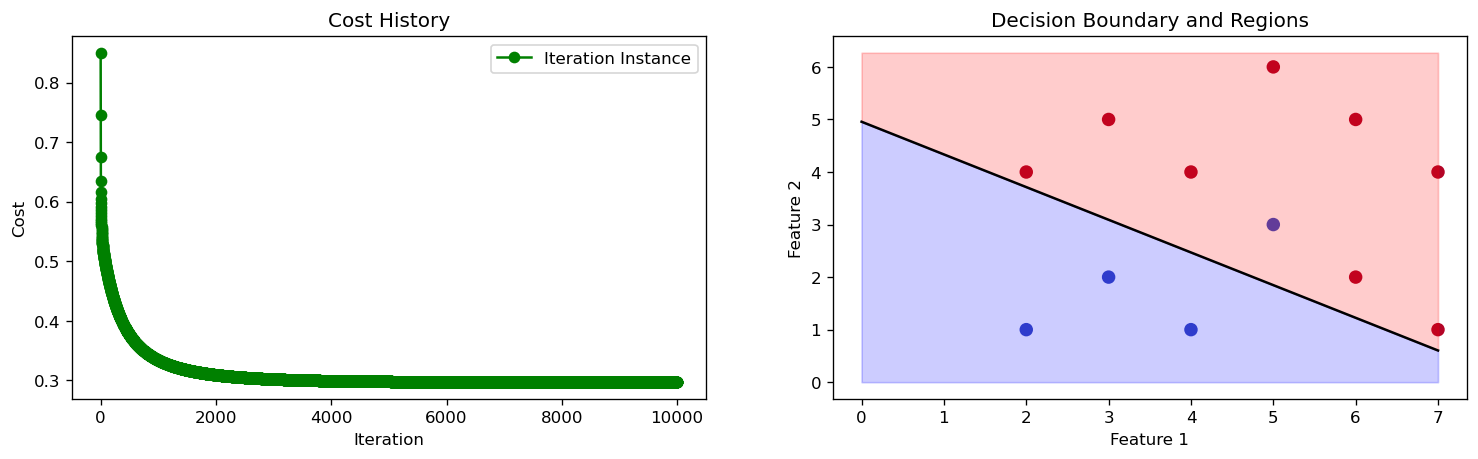

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), dpi=120)

# Plot the cost history (iterations vs cost)
ax1.plot([i for i in range(len(cost_history))], cost_history, 'go-', label='Iteration Instance')
ax1.set_title('Cost History')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

# Scatter plot of data points and decision boundary
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Data Points')

# Plot decision boundary
db_x = np.array(db_x)  # X coordinates of the decision boundary
db_y = np.array(db_y)  # Y coordinates of the decision boundary
ax2.plot(db_x, db_y, 'k-', label='Decision Boundary')

# Fill regions based on the decision boundary
# Above the boundary -> Class 1 Region
ax2.fill_between(db_x, db_y, y2=ax2.get_ylim()[1], color='red', alpha=0.2, label='Class 1 Region')
#fill from y1 to y2
# Below the boundary -> Class 2 Region
ax2.fill_between(db_x, db_y,   color='blue', alpha=0.2, label='Class 2 Region')
# Configure plot aesthetics
ax2.set_title('Decision Boundary and Regions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
# ax1.xlim(0,5000)
# ax1.ylim(0,2)
# ax1. 
# plt.tight_layout()
plt.show()


In [72]:
sales_data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [ ]:
new_sales=sales_data[['Age','Annual Income ($)','Work Experience','Family Size']]

spending_score=sales_data[['Spending Score (1-100)']]
X_train=new_sales.to_numpy()
Y_train=spending_score.to_numpy()
Y_train=Y_train.reshape(-1)
predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,alpha=0.00002,error_margin=0.01,iterations=2000)
plt.plot([i for i in range(len(cost_history))],cost_history,'v')
plt.show()

Initial W: [0.89688813 0.34826574 0.68549329 0.57571881] Initial B: 0.9584811421190874


<ipython-input-57-0b180e252773>:5: RuntimeWarning: overflow encountered in scalar power
  cost+=((np.dot(W,X[i])+b)-Y[i])**2
<ipython-input-56-26401e21299e>:5: RuntimeWarning: overflow encountered in multiply
  w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
<ipython-input-56-26401e21299e>:5: RuntimeWarning: overflow encountered in add
  w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
